<IPython.core.display.Javascript object>


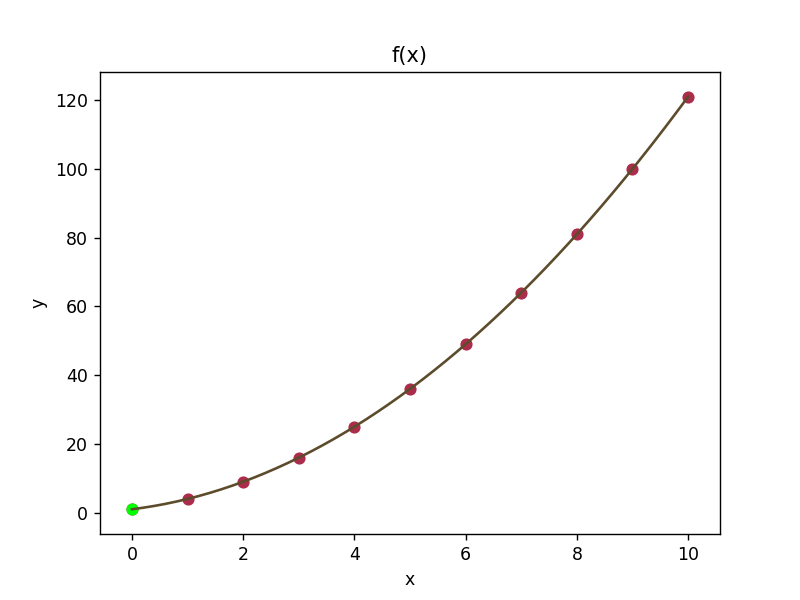

FloatSlider(value=0.0, description='X Value:', max=10.0, step=0.01)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# x^2 + 2x + 1
def f(x):
    if (isinstance(x,float)):
        return x**2 + 2*x + 1
    raise Exception("Input a float")

# Suppresses extra information
def suppress_info():
    ;

# Updates the green point on the plot
def update(value):
    global lastPoint
    slider_y = f(slider_x.value)
    temporaryPoint = plt.scatter(slider_x.value,slider_y, color = "#00FF00")
    lastPoint.remove()
    lastPoint = temporaryPoint
    
    
# Transform f into a function that acts on vectors
vf = np.vectorize(f)
    
# Find corresponding f(x)
x = np.linspace(0,10,num = 200)
y = vf(x)

# Find points corresponding to integer x
point_x = np.array([0,1,2,3,4,5,6,7,8,9,10],dtype=float)
point_y = vf(point_x)

# Initializes a slider and 2 global variables
slider_x = widgets.FloatSlider(min=0,max=10,step=0.01,description='X Value:',value=0)
slider_y = f(slider_x.value)

# Plots line and the points at integer locations
plt.plot(x,y, color = "#5C4C2C")
plt.scatter(point_x,point_y, color = "#AC2C4C")
lastPoint = plt.scatter(slider_x.value,slider_y, color = "#00FF00")
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")

# Updates slider
slider_x.observe(update,'value')
display(slider_x)
suppress_info()

<p>To find differentiate a function, the following limit is calculated.</p>

$$\frac{\textrm{d}f}{\textrm{d}x}(a) = \textrm{lim}_{x \rightarrow a} \frac{f(x)-f(a)}{x-a}$$

<p>In our case, the function is $ f(x) = x^2 + 2\cdot x + 1 $ </p>

<IPython.core.display.Javascript object>


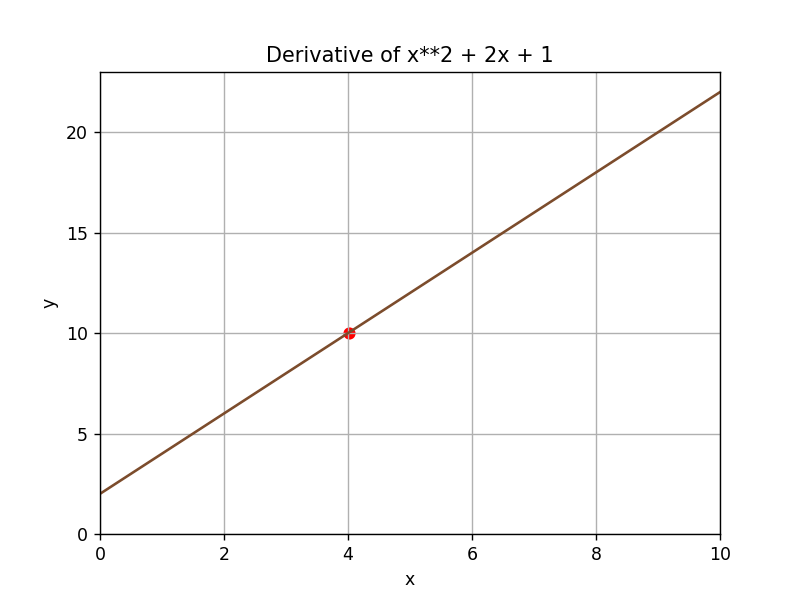

FloatSlider(value=0.1, description='a Value:', max=9.99, min=0.1, step=0.01)

In [2]:
# Create new figure
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

# Derivative
def diff_f(x,a):
    if (x - a != 0.0):
        return (f(x)-f(a))/(x - a)
    else:
        return 0
    
def update(value):
    global lastLines, lastPoint
    tempPoint = ax.scatter(slider_a.value,vdiff_f(slider_a.value,slider_a.value-0.01), color = "#FF0000")
    lastPoint.remove()
    lastPoint = tempPoint
    
    # Do this to remove lines
    #tempLines = ax.plot(x,ydiff, color = "#7C4C2C")
    #lastLines.pop(0).remove()
    #lastLines = tempLines
    
# Vectorize derivative
vdiff_f = np.vectorize(diff_f)
ydiff = vdiff_f(x,x-0.00001)

# Initializes a slider and 2 global variables
slider_a = widgets.FloatSlider(min=0.1,max=9.99,step=0.01,description='a Value:',value=0.01)


# Do this to remove lines
#lastLines = ax.plot(x,ydiff, color = "#7C4C2C")

# Plot derivative
ax.plot(x,ydiff, color = "#7C4C2C")
lastPoint = ax.scatter(slider_a.value,vdiff_f(slider_a.value,slider_a.value-0.00001), color = "#FF0000")
plt.title("Derivative of x**2 + 2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,10)
plt.ylim(0,23)
plt.grid(True)

# Interact with slider
display(slider_a)
slider_a.observe(update,'value')
suppress_info()

$\textrm{The result is the line :}$ 

$$ f'(x) = 2\cdot x + 2 $$

$\textrm{That has slope 2 and offset 2.} $